# Sampling from a GP

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  ⋮
  1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0

### We create a function to visualize the data

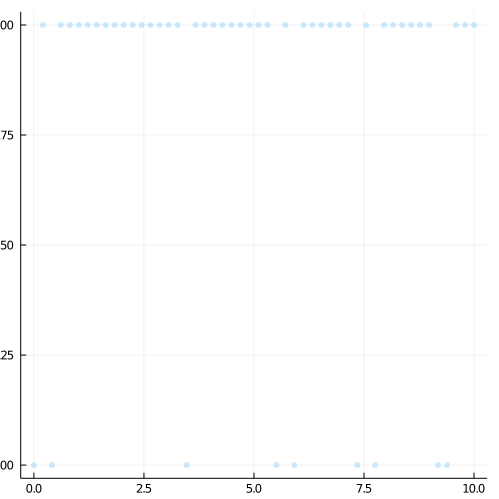

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##475 string:1
  0.733851 seconds (1.13 M allocations: 66.106 MiB, 99.42% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##475 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:04:44
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:02:24
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:01:36
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:12
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:00:57
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:00:47
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:40
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:35
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:31
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:28
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:25
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:23
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[-0.02999929033080595, 0.21807533578905897, 0.518588432377656, 0.816100063808334, 1.1212126134013785, 1.352847410818914, 1.5669624983598391, 1.7483060564602704, 1.8529276305300884, 1.9434986564314118  …  0.5341317445565793, 0.7304870085841552, 0.8609595041665997, 0.9233899807044086, 0.879507978002095, 0.7789488880098909, 0.676495980657865, 0.5865247567865406, 0.5898216340802837, 0.5734705720662485]]
 [[-0.45880785129599577, -0.40467088353307207, -0.2720565834150805, -0.10447013574193775, 0.04106162374505029, 0.16433505041766694, 0.2814584995629894, 0.3866366969794356, 0.5357103854650536, 0.7264043753275876  …  1.3727485757223739, 1.3718055601403512, 1.332932008293894, 1.2678606759652487, 1.225082152496401, 1.2159054272253031, 1.2159517797010428, 1.2232696864504622, 1.1979103807460652, 1.1862188990237483]]
 [[-0.4353882322219455, -0.13344807930222108, 0.19263908842122285, 0.5289820142539605, 0.8080100431001418, 1.013980360828854, 1.1334580

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

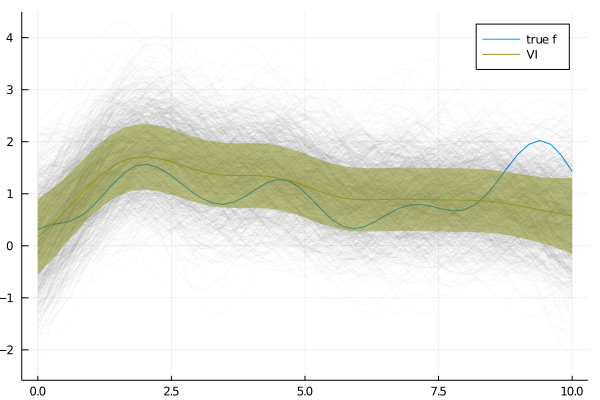

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

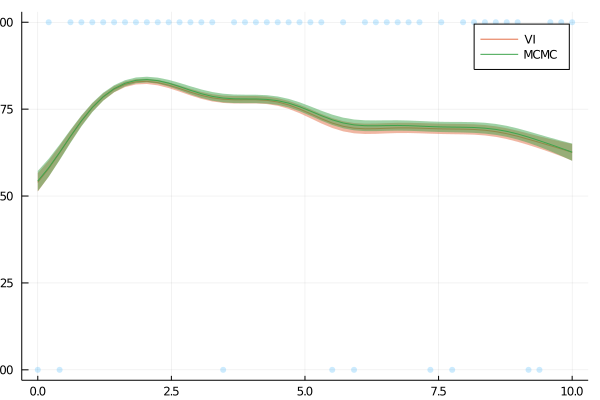

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*